In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [4]:
import yfinance as yf

# Fetch Apple stock data again
df = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
df.reset_index(inplace=True)

# Check the first few rows
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
1      2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2      2020-01-06  72.582924  72.621661  70.876090  71.127881  118387200
3      2020-01-07  72.241562  72.849239  72.021246  72.592609  108872000
4      2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


In [5]:
print(df.isnull().sum())  # Check for missing values


Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [6]:
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
print(df.isnull().sum())  # Verify that there are no missing values left


Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_286776\3756678038.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Set Date as index for time series analysis


In [8]:
print(df.describe())  # Summary statistics


Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean     152.177631   153.707451   150.471750   152.022499  9.057384e+07
std       42.073135    42.214241    41.849262    42.016644  5.325460e+07
min       54.449890    55.452156    51.595986    55.350231  2.323470e+07
25%      126.946346   128.070211   124.935174   126.388685  5.546825e+07
50%      150.761024   152.511339   148.819351   150.580333  7.627980e+07
75%      176.831440   178.390041   175.258386   176.636626  1.077425e+08
max      258.735504   259.814335   257.347047   257.906429  4.265100e+08


### Inference: Stock Price Trend of AAPL

The plot shows the **AAPL stock price trend**, highlighting:

1. **Fluctuations**: Regular ups and downs, reflecting market volatility.
2. **Trend**: The overall direction (upward or downward) suggests the stock's performance.
3. **Volatility**: Periods of sharp price changes indicate higher market activity or reactions to news.

This visualization offers insights into AAPL's market behavior over time.


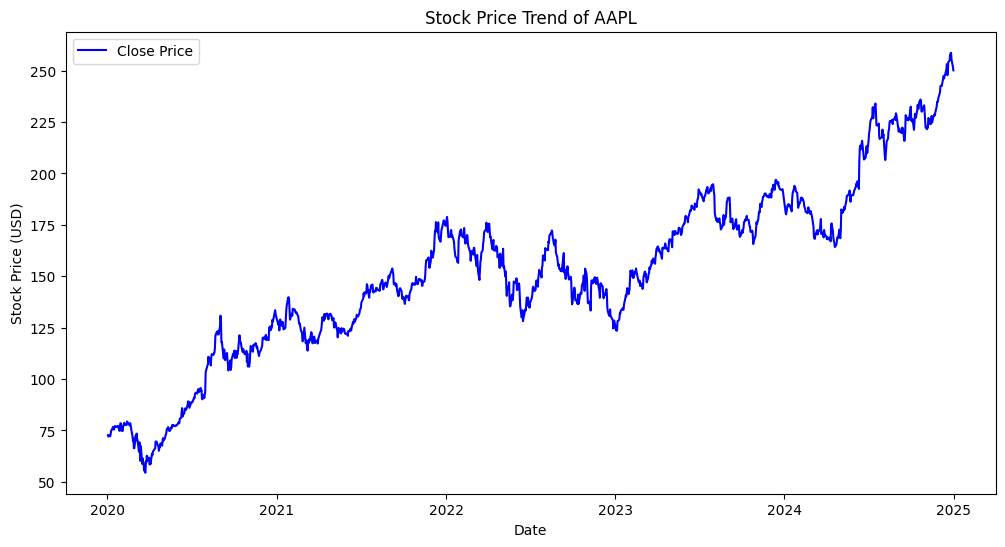

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Close Price", color='blue')

plt.title("Stock Price Trend of AAPL")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


### Inference: Distribution of Daily Returns for AAPL

The histogram illustrates the distribution of **daily returns** for AAPL stock. Key insights include:

1. **Normal Distribution**: The data likely follows a **normal distribution** centered around zero, suggesting that daily returns are generally stable with both positive and negative fluctuations.
2. **Volatility**: The spread and shape of the distribution show how volatile the stock's daily returns can be. Larger peaks near zero indicate more frequent, smaller daily returns.
3. **Outliers**: Any spikes in the tails of the distribution represent days with unusually high or low returns, which could indicate major events or market reactions.

This visualization helps to understand the frequency and behavior of AAPL's daily stock price changes.


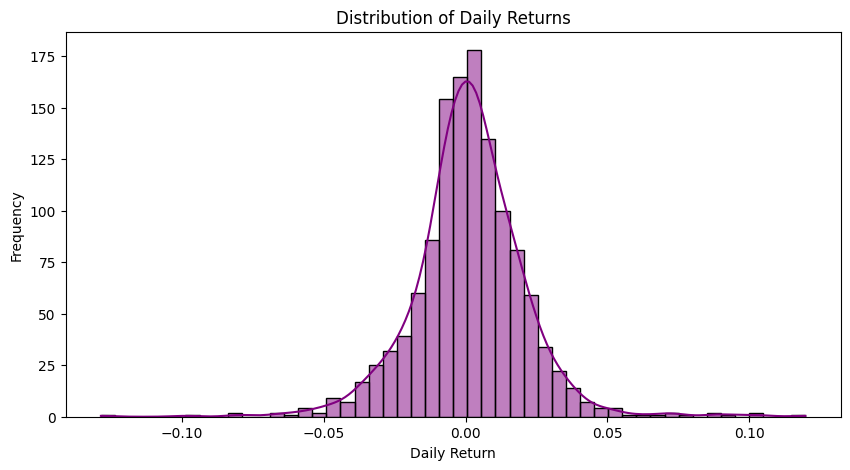

In [10]:
df["Daily Return"] = df["Close"].pct_change()


plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


### Inference: Stock Price with Moving Averages (50-day & 200-day)

The plot visualizes **AAPL's stock price** alongside two key **moving averages** (MA):

1. **50-Day Moving Average (Blue Line)**: This short-term MA smooths out daily price fluctuations and is sensitive to recent price changes. It reacts faster to price shifts and is often used to identify short-term trends.
2. **200-Day Moving Average (Red Line)**: This long-term MA provides a smoother, more stable view of the stock price trend, and is used to identify long-term trends in the stock's performance.
3. **Price Action (Black Line)**: The **Close Price** shows the daily stock price, fluctuating between the two moving averages. When the price crosses above the 50-day or 200-day MA, it may signal a potential upward trend, while crossing below may indicate a downward trend.

The plot helps to visualize the relationship between short-term and long-term trends, offering valuable insights into the stock's potential movements.


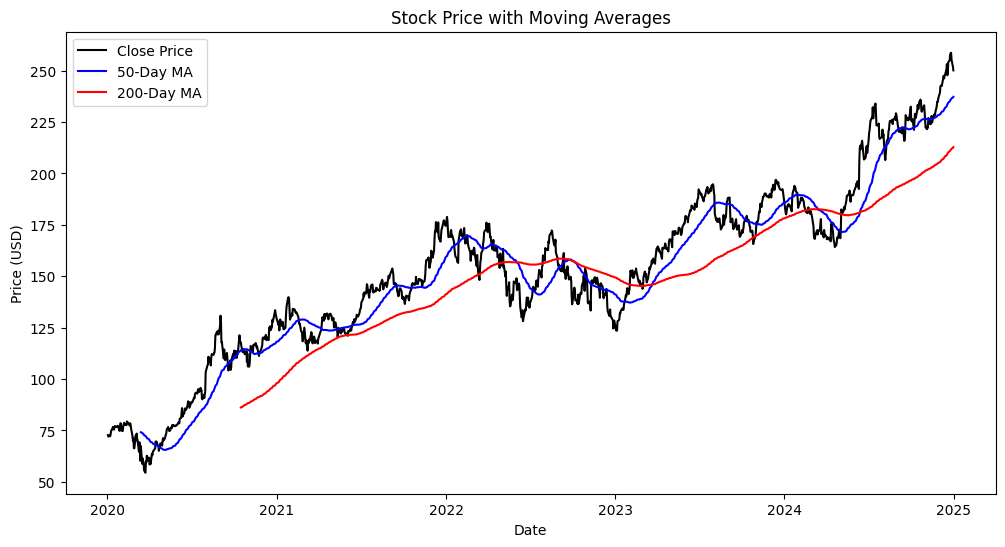

In [11]:
df["50_MA"] = df["Close"].rolling(window=50).mean()
df["200_MA"] = df["Close"].rolling(window=200).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='black')  # Replaced 'Adj Close' with 'Close'
plt.plot(df['50_MA'], label='50-Day MA', color='blue')
plt.plot(df['200_MA'], label='200-Day MA', color='red')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### Inference: Stock Trading Volume Over Time for AAPL

The bar chart visualizes **AAPL's trading volume** over time. Key observations include:

1. **Volume Fluctuations**: The chart shows the changes in trading volume, reflecting periods of high or low market activity. Spikes in volume may correspond to significant news events or earnings reports.
2. **Periodic Patterns**: The x-axis shows the data broken down by **quarters** (every 3 months), allowing us to observe seasonal trends or recurring patterns in trading activity.
3. **Market Sentiment**: Periods of higher volume often signal increased market interest or volatility, which can impact stock price movements.

This visualization helps identify periods of active trading and provides insights into market dynamics for AAPL over time.


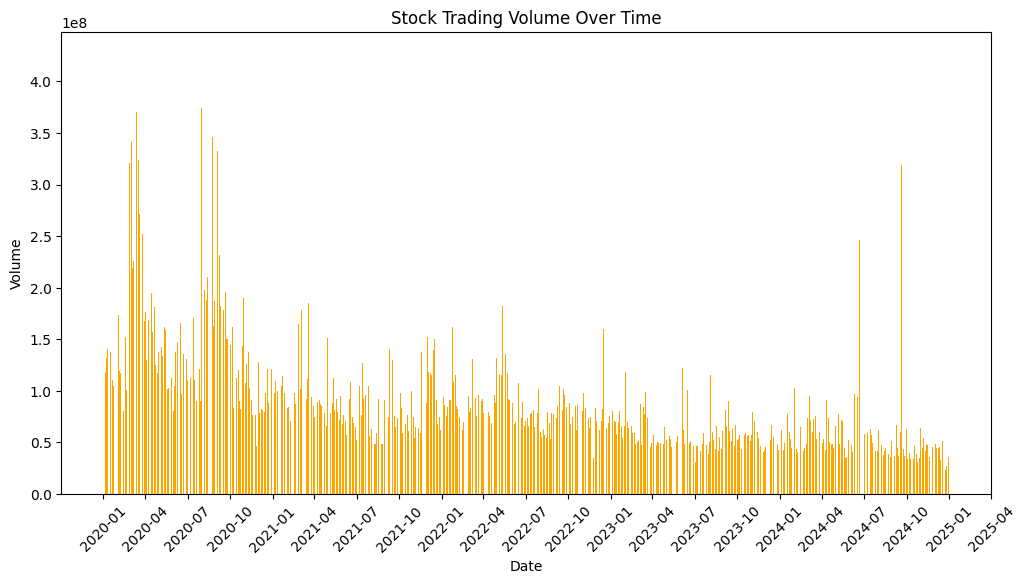

In [12]:
import matplotlib.dates as mdates

df = df.copy()  # Avoid modifying the original DataFrame
df.index = pd.to_datetime(df.index)  # Convert index back to datetime for better handling

plt.figure(figsize=(12, 6))
plt.bar(df.index, df[('Volume', 'AAPL')], color='orange')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.xticks(rotation=45)  # Rotate for better readability

plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


### Inference: Stock Trading Volume Over Time for AAPL (Line Chart)

The line chart illustrates **AAPL's stock trading volume** over time. Key insights include:

1. **Volume Trends**: The chart shows how trading volume fluctuates, with peaks indicating times of higher market activity and interest in AAPL stock.
2. **Marker Clarity**: The use of markers (`'o'`) on the line provides clearer visualization of specific trading volume data points, making it easier to identify significant changes.
3. **Monthly Intervals**: The x-axis is formatted to display every 3rd month, highlighting long-term volume trends without overloading the viewer with too much detail.
4. **Seasonal or Event-Based Patterns**: Spikes in trading volume might correlate with market events, earnings announcements, or broader economic shifts affecting AAPL.

This visualization provides a clearer understanding of trading volume dynamics for AAPL over time, showing both general trends and specific events of interest.


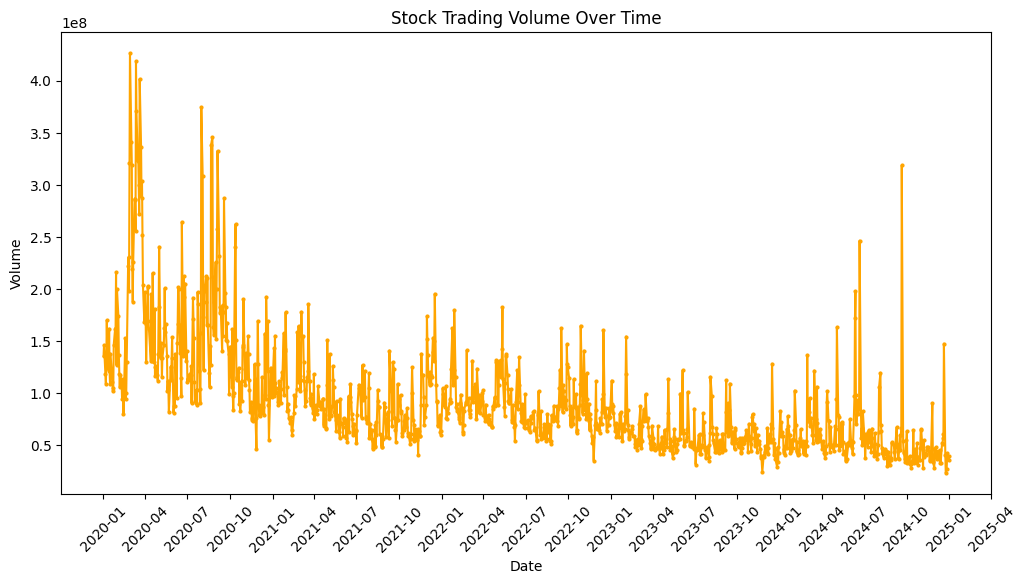

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('Volume', 'AAPL')], color='orange', linestyle='-', marker='o', markersize=2)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


### Inference: Stock Price Volatility Over Time for AAPL

The plot shows the **30-day rolling volatility** of AAPL's stock price, calculated based on daily returns. Key observations include:

1. **Volatility Spikes**: Periods of high volatility are visible as spikes in the red line. These may correspond to times of market uncertainty, major company events, or macroeconomic factors impacting AAPL's stock price.
2. **Lower Volatility Periods**: The smoother sections of the line represent periods of relative stability in AAPL's stock price.
3. **Trend Analysis**: The chart highlights how volatility varies over time, providing insights into how risky or stable the stock has been over different periods.

This visualization is useful for understanding AAPL’s risk profile over time and can help investors assess when the stock is more volatile and potentially riskier to trade.


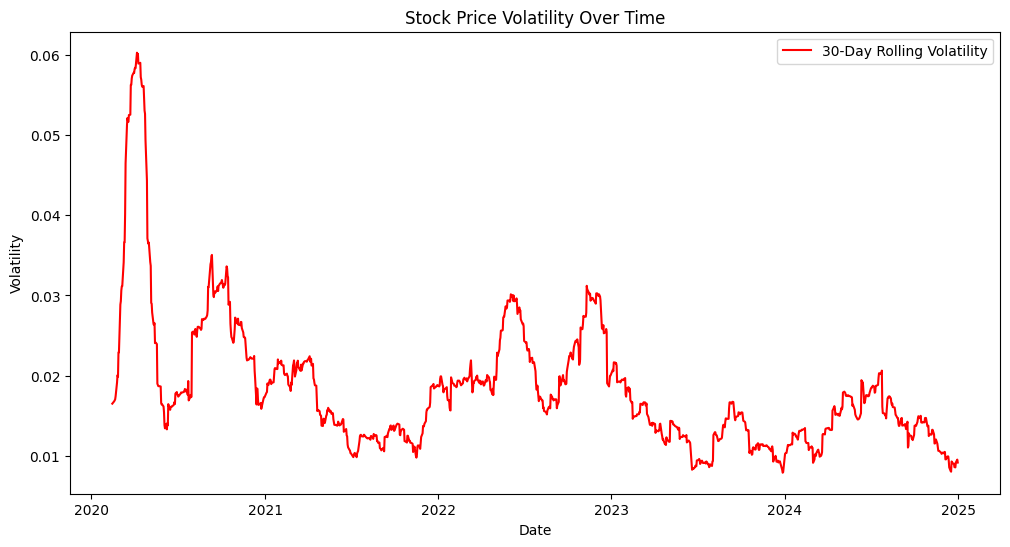

In [14]:
df['30d_volatility'] = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['30d_volatility'], label='30-Day Rolling Volatility', color='red')
plt.title("Stock Price Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


### 📊 **Inference from the Correlation Heatmap**  

- A **high correlation** (close to 1) suggests AAPL and MSFT move similarly due to market and industry trends.  
- A **moderate correlation** (0.3–0.7) indicates partial independence in stock movement.  
- A **low correlation** (< 0.3) means the stocks behave independently, though unlikely for tech giants.  

This helps in assessing diversification and risk management in a portfolio. 🚀  


[*********************100%***********************]  2 of 2 completed


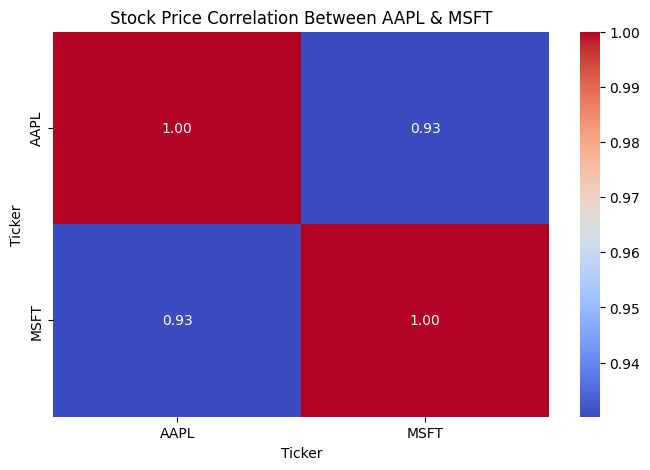

In [15]:
start_date = "2020-01-01"
end_date = "2025-01-01"

tickers = ["AAPL", "MSFT"]
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Price Correlation Between AAPL & MSFT")
plt.show()

Apple vs Microsoft Stock Prices
Both stocks show a similar growth trend over time.
Price fluctuations indicate market events affecting both companies.
Helps in comparing performance and volatility.

[*********************100%***********************]  2 of 2 completed
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


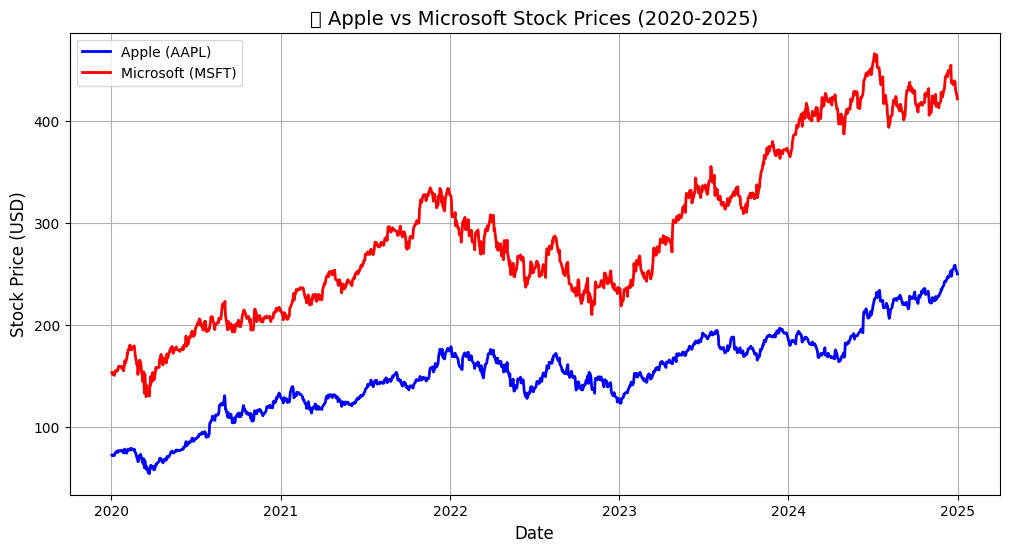

In [16]:

tickers = ["AAPL", "MSFT"]
data = yf.download(tickers, start=start_date, end=end_date)['Close']

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AAPL'], label="Apple (AAPL)", color='blue', linewidth=2)
plt.plot(data.index, data['MSFT'], label="Microsoft (MSFT)", color='red', linewidth=2)

plt.title("📈 Apple vs Microsoft Stock Prices (2020-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)


plt.show()


### Summary of the Jupyter Notebook

This Jupyter Notebook provides a comprehensive analysis of Apple Inc. (AAPL) stock data from 2020 to 2025, using various data visualization techniques to gain insights into stock performance, trends, and market behavior. Below is a summary of the key steps and analyses performed:

1. **Data Import and Preparation**:
    - Installed necessary libraries: `yfinance`, `pandas`, `numpy`, `seaborn`, and `matplotlib`.
    - Imported required modules and fetched AAPL stock data using `yfinance`.
    - Checked and handled missing values by forward filling.

2. **Data Transformation**:
    - Converted the 'Date' column to datetime format and set it as the index for time series analysis.

3. **Descriptive Statistics**:
    - Displayed summary statistics of the stock data to understand basic metrics like mean, standard deviation, etc.

4. **Stock Price Trend Visualization**:
    - Plotted the closing price of AAPL over time to observe overall trends and fluctuations.

5. **Daily Returns Analysis**:
    - Calculated daily returns and visualized their distribution using a histogram to understand the volatility and frequency of returns.

6. **Moving Averages**:
    - Computed and plotted 50-day and 200-day moving averages to identify short-term and long-term trends in stock prices.

7. **Trading Volume Analysis**:
    - Visualized trading volume over time using both bar and line charts to identify periods of high and low market activity.

8. **Volatility Analysis**:
    - Calculated and plotted 30-day rolling volatility to assess periods of high and low price stability.

9. **Correlation Analysis**:
    - Compared AAPL with Microsoft (MSFT) by plotting their stock prices and generating a correlation heatmap to understand their relationship.

Each section includes visualizations and markdown inferences to interpret the results, providing a detailed understanding of AAPL's stock performance and market behavior over the specified period.